In [55]:
# Import required libraries
import scipy.io
import seaborn as sns
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import scipy.signal as signal

In [56]:
# Check for data file
for root, dirs, files in os.walk(r"final_data\vibecheck360", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

final_data\vibecheck360\bpfi_p1_01.txt
final_data\vibecheck360\bpfi_p2_01.txt
final_data\vibecheck360\bpfo_p1_01.txt
final_data\vibecheck360\bpfo_p2_01.txt
final_data\vibecheck360\bsf_p1_01.txt
final_data\vibecheck360\bsf_p2_01.txt
final_data\vibecheck360\normal_p1_01.txt
final_data\vibecheck360\normal_p2_01.txt


In [57]:
# Load bpfi_p1_01 as dataframe
path = r"final_data\vibecheck360\bpfi_p1_01.txt"

data = []

with open(path, 'r') as file:
    for line in file:
        line_data = line.strip().split('\t')
        line_data = [value.replace('g', '') for value in line_data]
        line_data = [float(value) for value in line_data]
        data.append(line_data)

df = pd.DataFrame(data, columns=['index', 'time', 'x-axis', 'y-axis', 'z-axis'])

print(df)

           index        time    x-axis    y-axis    z-axis
0            1.0    1.337530 -0.446639  0.573231 -0.883485
1            2.0    1.340167 -0.117707  0.975800  1.790815
2            3.0    1.342752 -0.099927  0.566760 -1.457609
3            4.0    1.345327 -0.473929  1.053581 -2.379320
4            5.0    1.347915  0.314598  0.781803  1.179557
...          ...         ...       ...       ...       ...
102438  102439.0  264.586532  0.756757  0.886187  1.906223
102439  102440.0  264.589084 -0.462007  0.756573 -1.099555
102440  102441.0  264.591669  0.322247  1.136657  0.512234
102441  102442.0  264.594227 -0.281243  0.566237 -1.093093
102442  102443.0  264.596813  0.013301  0.707028 -1.516040

[102443 rows x 5 columns]


In [58]:
df = df.drop(columns='index')
print(df)

              time    x-axis    y-axis    z-axis
0         1.337530 -0.446639  0.573231 -0.883485
1         1.340167 -0.117707  0.975800  1.790815
2         1.342752 -0.099927  0.566760 -1.457609
3         1.345327 -0.473929  1.053581 -2.379320
4         1.347915  0.314598  0.781803  1.179557
...            ...       ...       ...       ...
102438  264.586532  0.756757  0.886187  1.906223
102439  264.589084 -0.462007  0.756573 -1.099555
102440  264.591669  0.322247  1.136657  0.512234
102441  264.594227 -0.281243  0.566237 -1.093093
102442  264.596813  0.013301  0.707028 -1.516040

[102443 rows x 4 columns]


In [59]:
# Check for data file
for root, dirs, files in os.walk(r"final_data\vibecheck360", topdown=False):
    for file_name in files:
        path = os.path.join(root, file_name)
        print(path)

        # Load each file as a dataframe
        data = []
        with open(path, 'r') as file:
            for line in file:
                line_data = line.strip().split('\t')
                line_data = [value.replace('g', '') for value in line_data]
                line_data = [float(value) for value in line_data]
                data.append(line_data)

        df = pd.DataFrame(data, columns=['index', 'time', 'x-axis', 'y-axis', 'z-axis'])
        df = df.drop(columns=['index'])

        # Extract fault, p1/p2, and index from the file name
        fault, p, index = file_name.split("_")[:3]

        # Save acceleration data to separate files for each axis
        for axis in ['x-axis', 'y-axis', 'z-axis']:
            axis_df = df[['time', axis]]
            axis_output_file = f"final_data/vibecheck360/seperated_byAxis/{fault}_{p}_{axis}.txt"
            axis_df.to_csv(axis_output_file, sep='\t', index=False, header=False)
            print("Acceleration data for", axis, "saved to:", axis_output_file)


final_data\vibecheck360\bpfi_p1_01.txt
Acceleration data for x-axis saved to: final_data/vibecheck360/seperated_byAxis/bpfi_p1_x-axis.txt
Acceleration data for y-axis saved to: final_data/vibecheck360/seperated_byAxis/bpfi_p1_y-axis.txt
Acceleration data for z-axis saved to: final_data/vibecheck360/seperated_byAxis/bpfi_p1_z-axis.txt
final_data\vibecheck360\bpfi_p2_01.txt
Acceleration data for x-axis saved to: final_data/vibecheck360/seperated_byAxis/bpfi_p2_x-axis.txt
Acceleration data for y-axis saved to: final_data/vibecheck360/seperated_byAxis/bpfi_p2_y-axis.txt
Acceleration data for z-axis saved to: final_data/vibecheck360/seperated_byAxis/bpfi_p2_z-axis.txt
final_data\vibecheck360\bpfo_p1_01.txt
Acceleration data for x-axis saved to: final_data/vibecheck360/seperated_byAxis/bpfo_p1_x-axis.txt
Acceleration data for y-axis saved to: final_data/vibecheck360/seperated_byAxis/bpfo_p1_y-axis.txt
Acceleration data for z-axis saved to: final_data/vibecheck360/seperated_byAxis/bpfo_p1_z-a

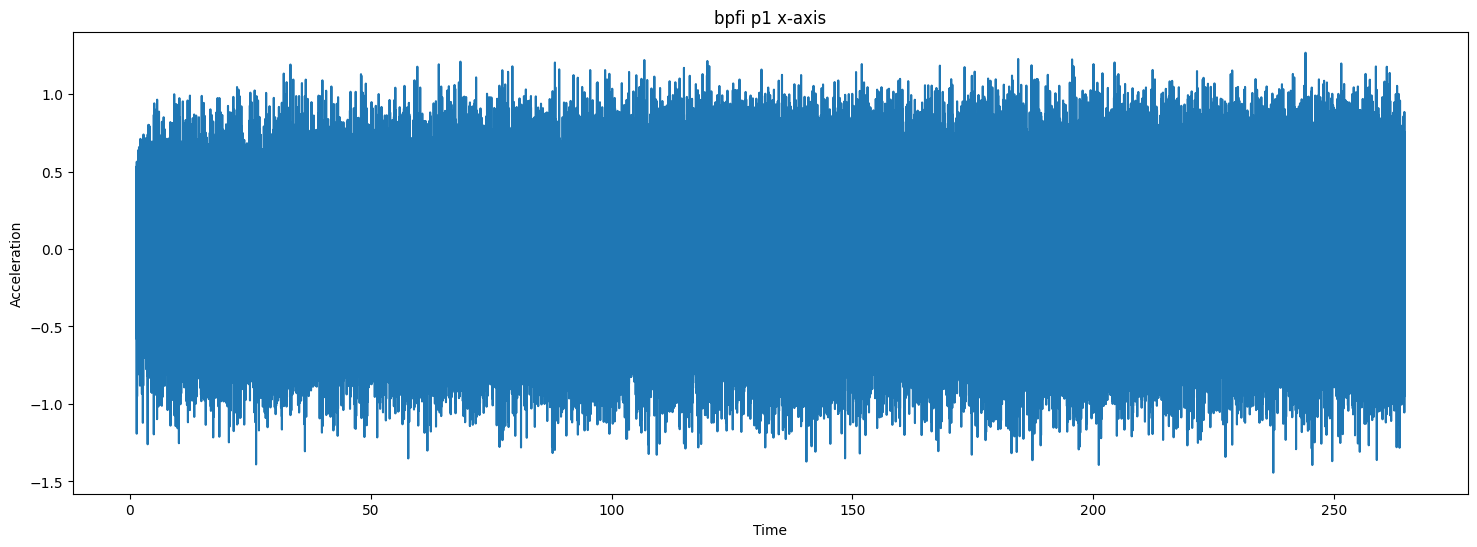

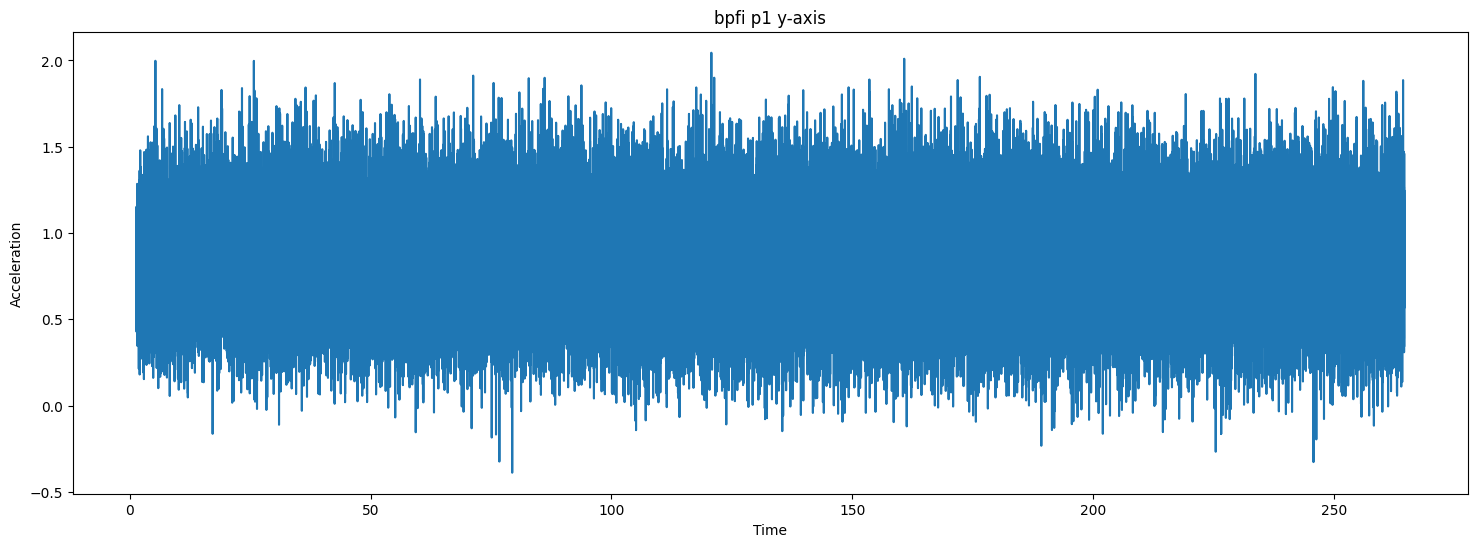

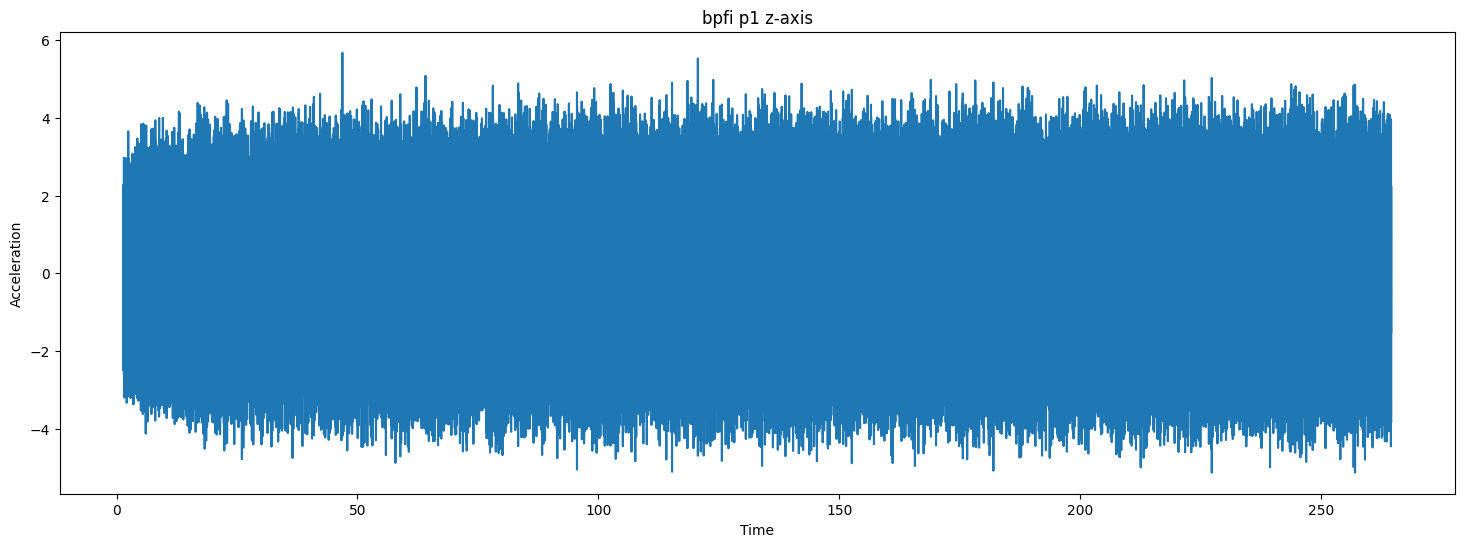

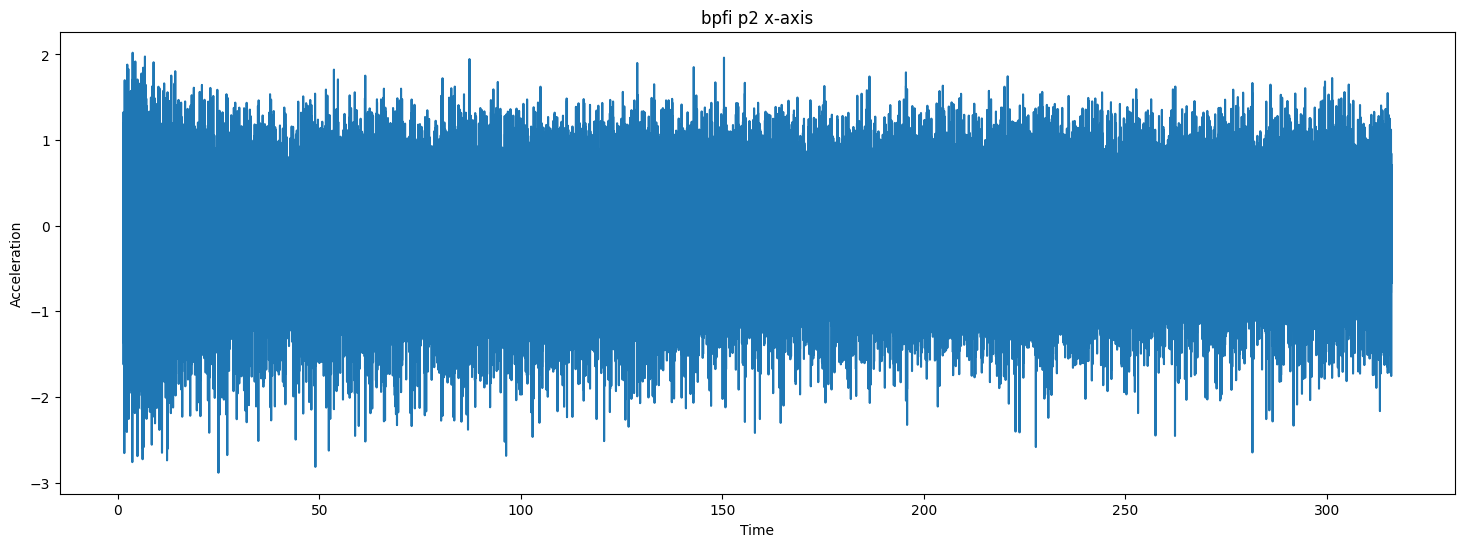

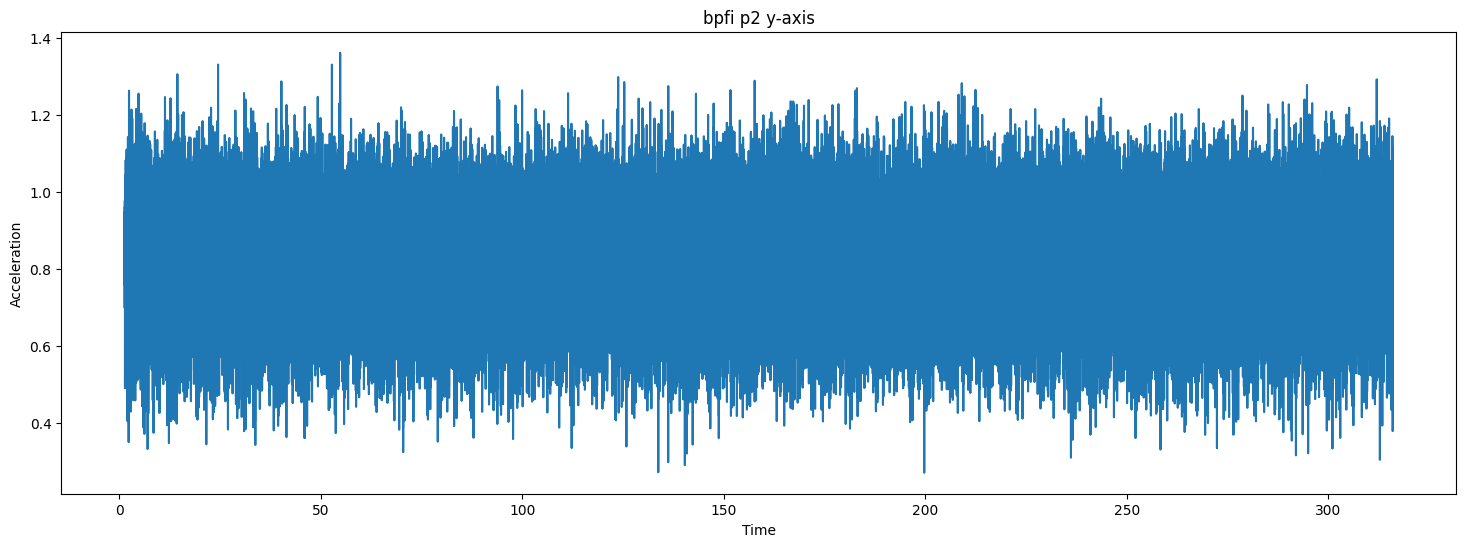

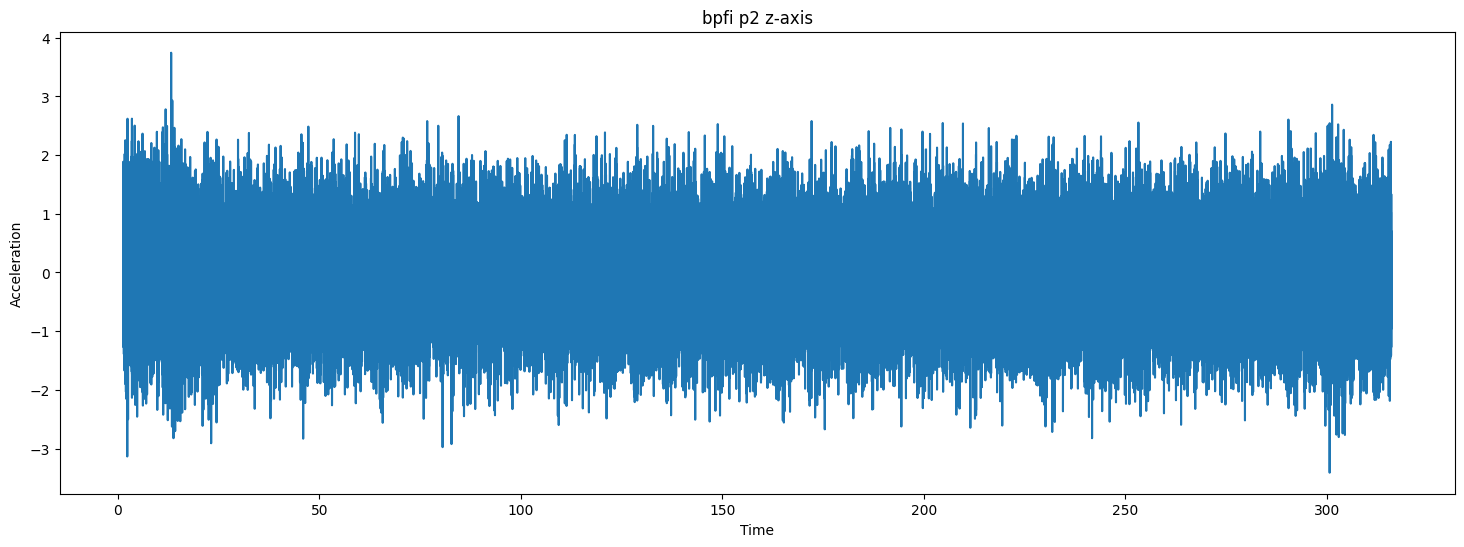

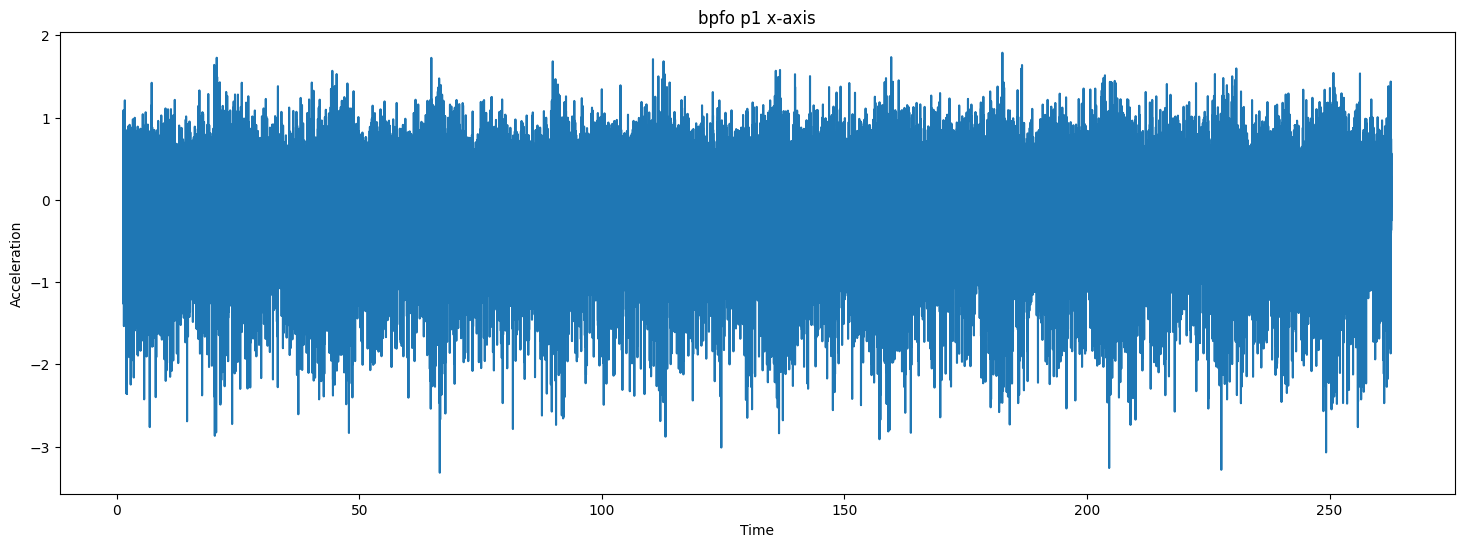

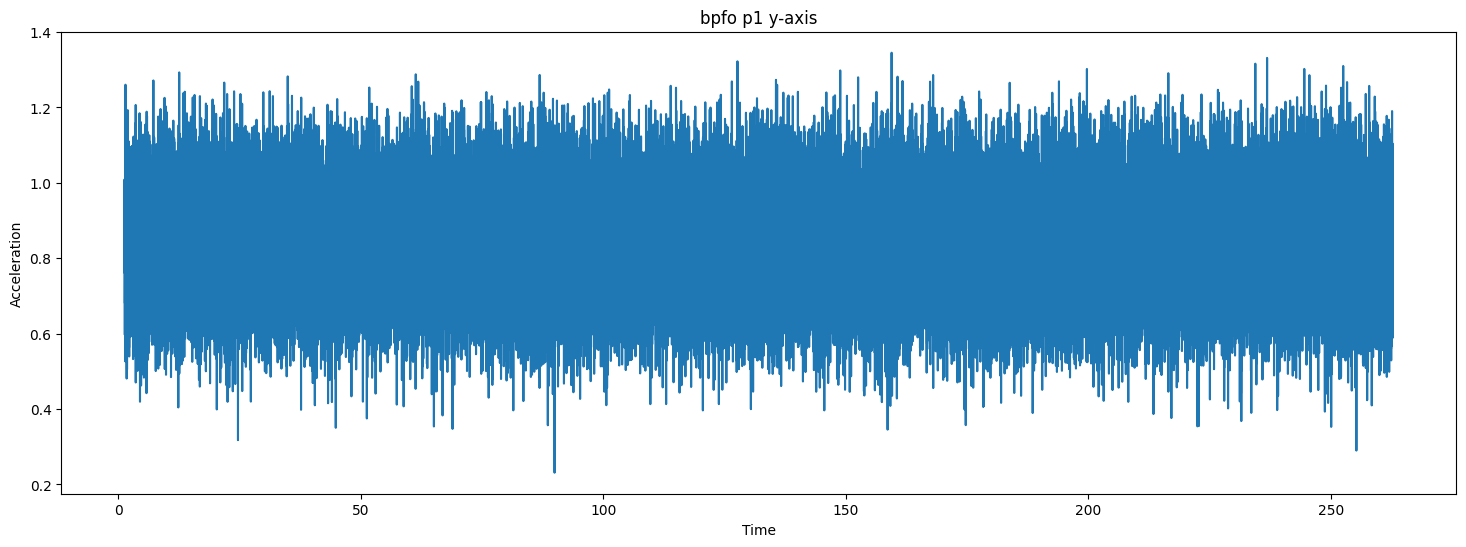

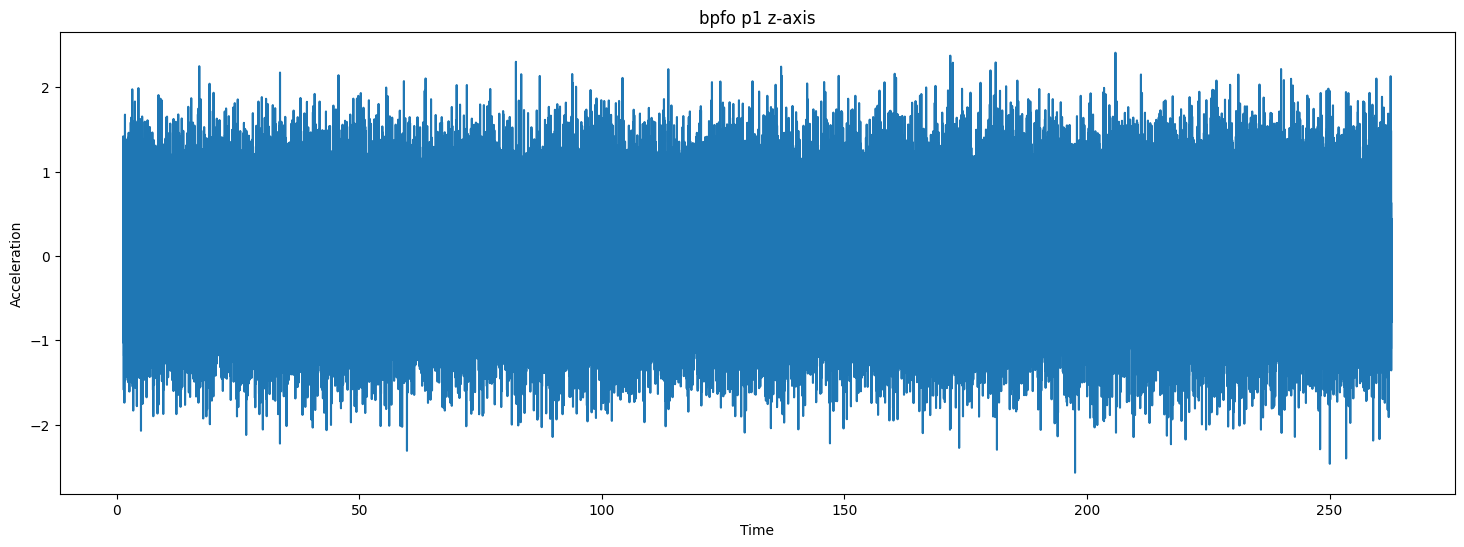

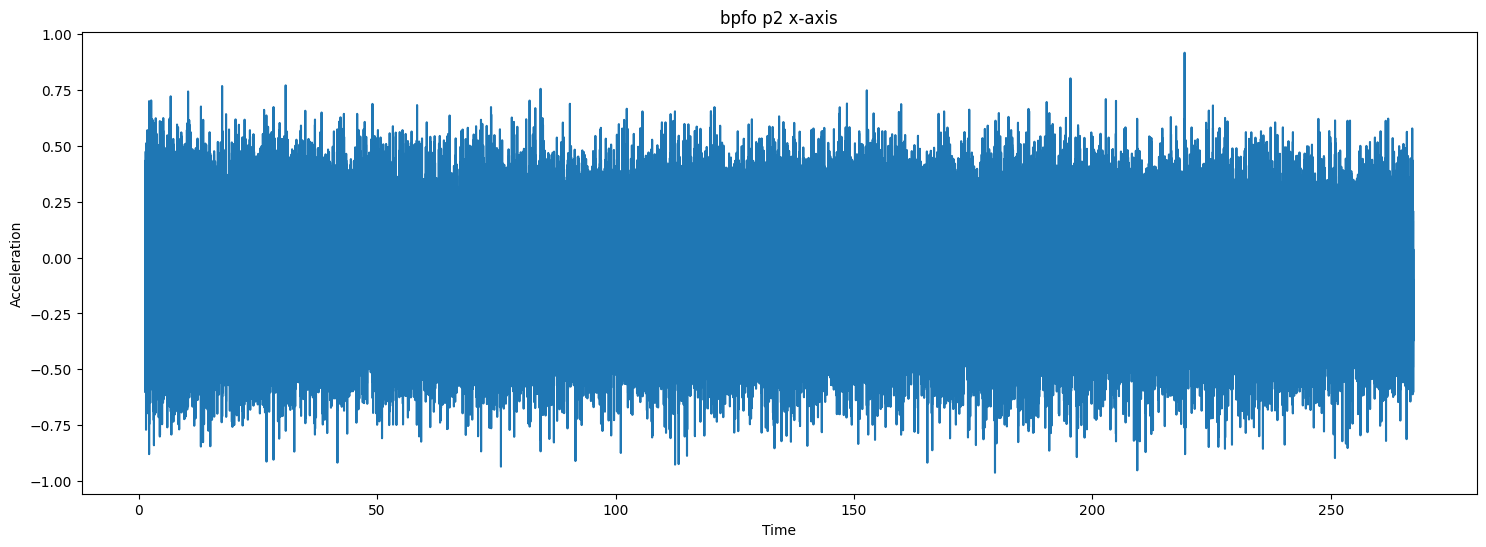

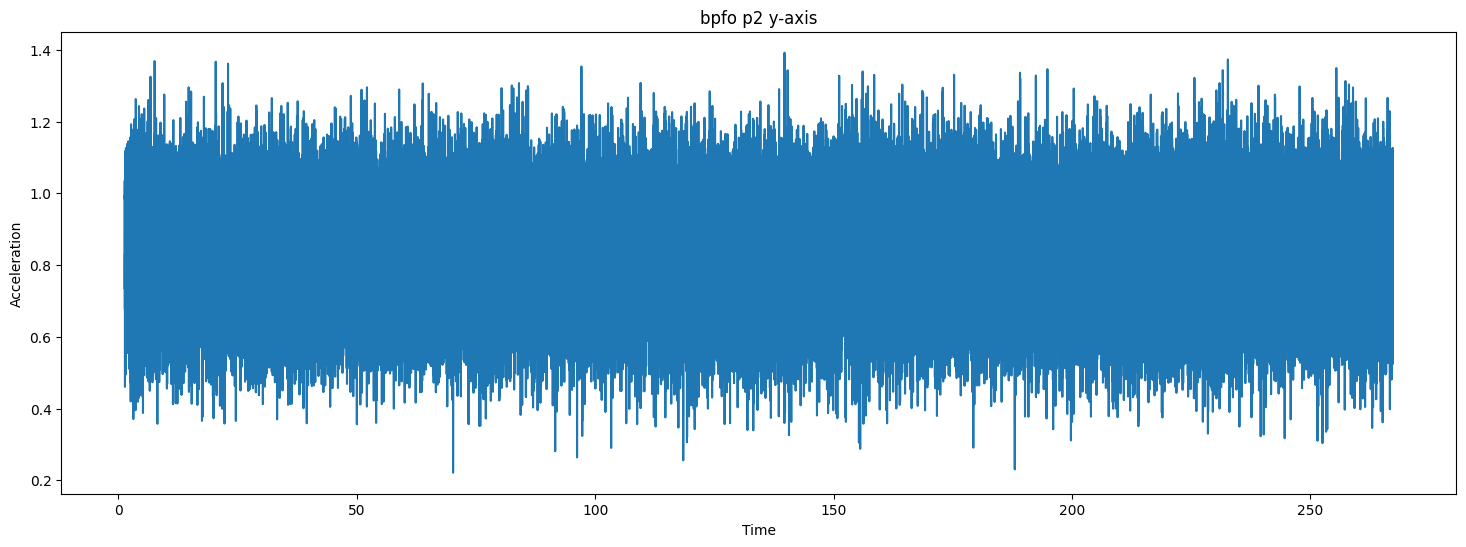

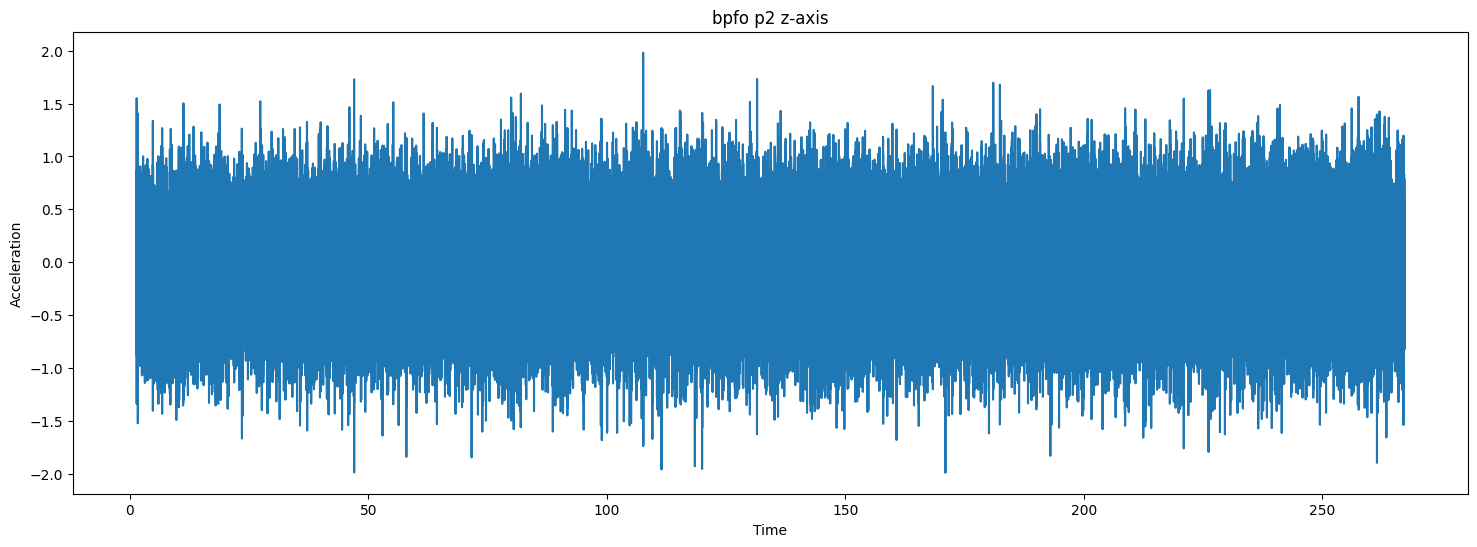

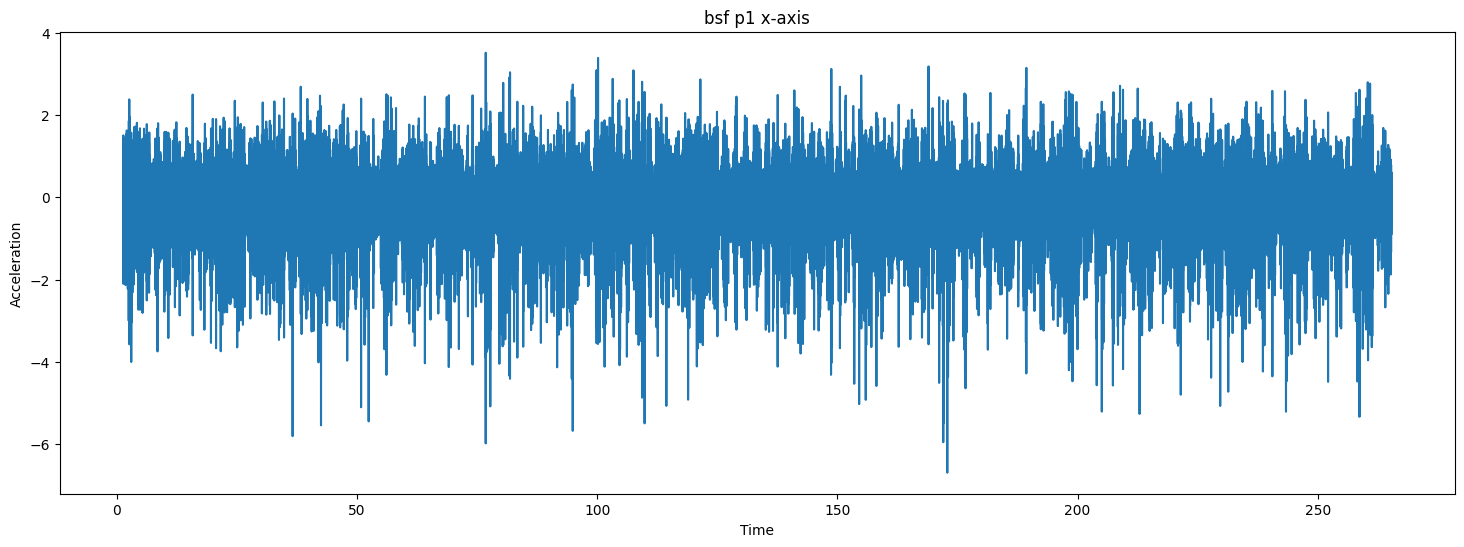

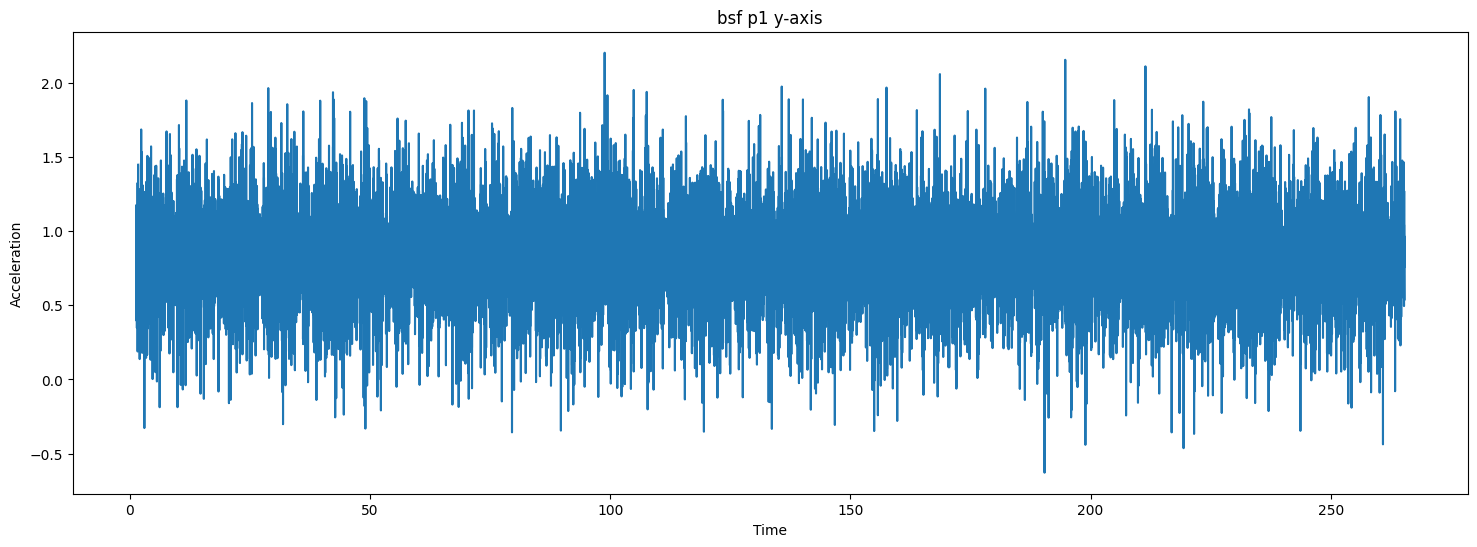

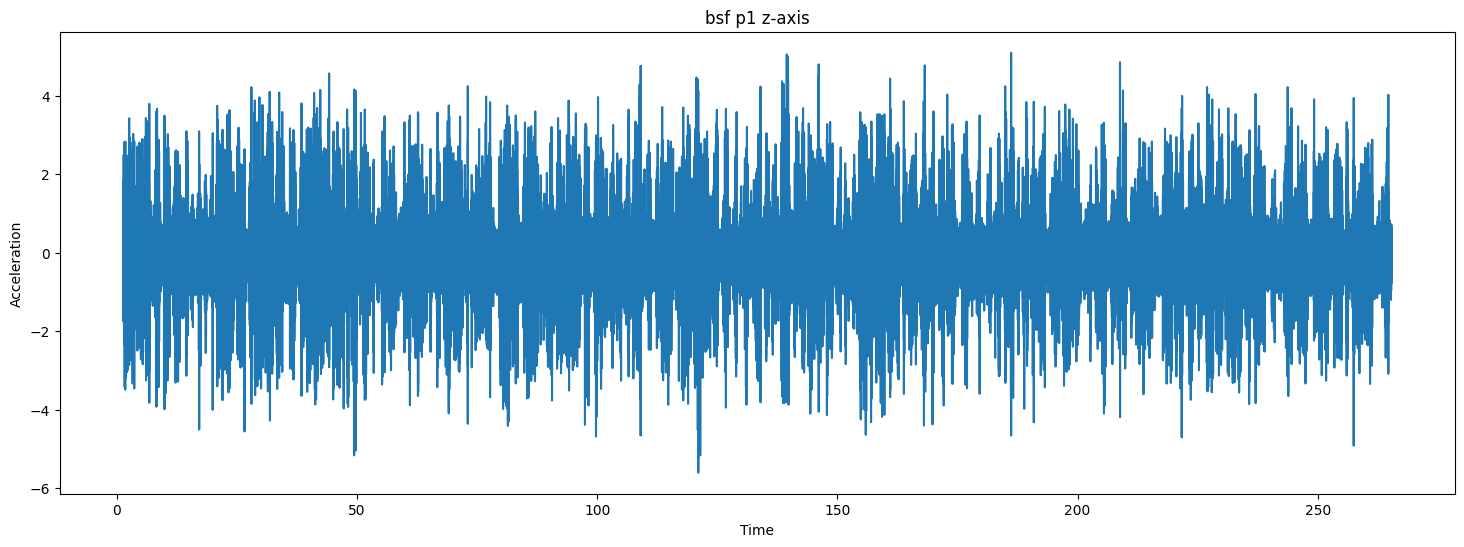

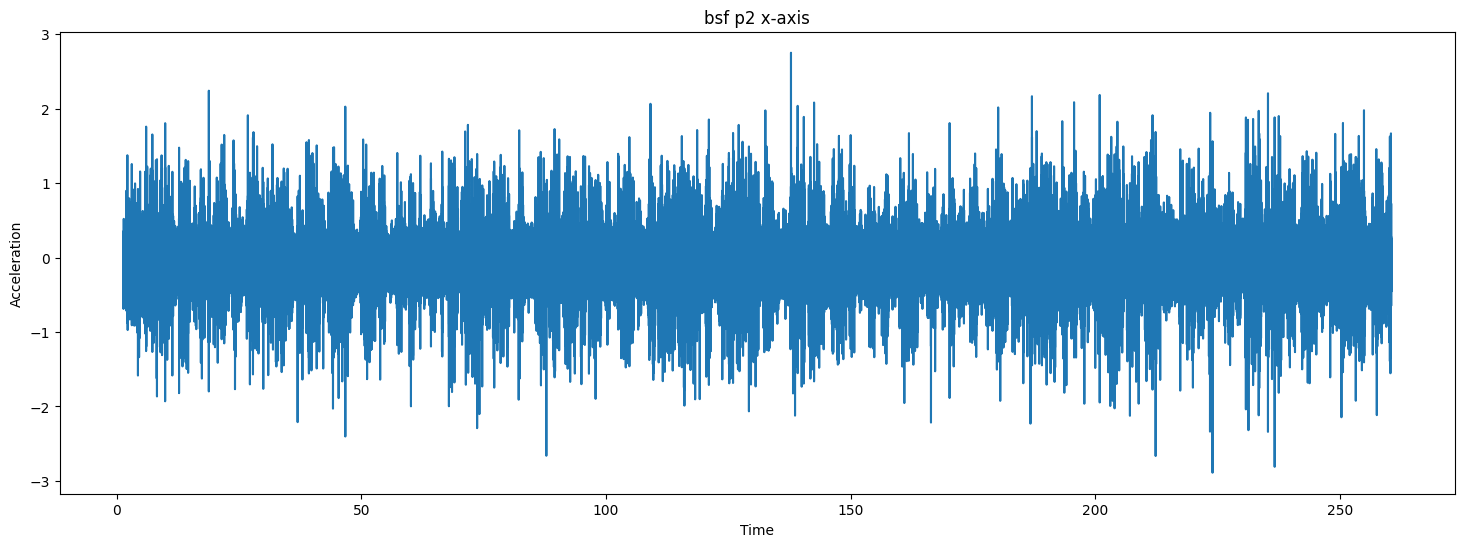

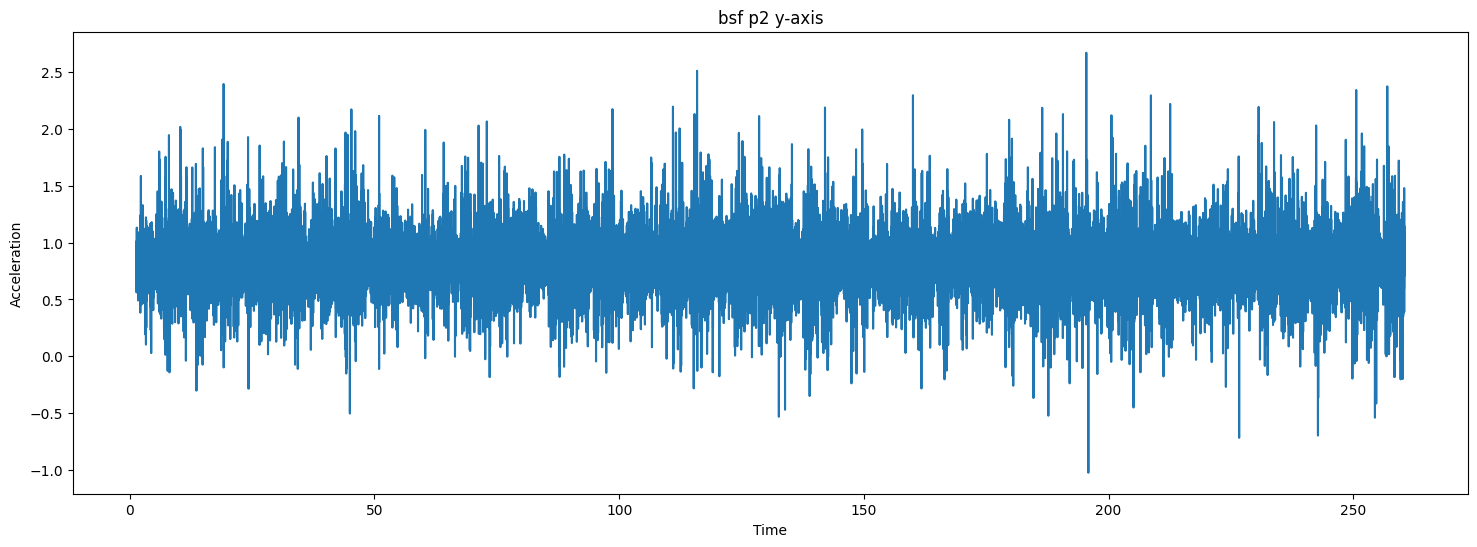

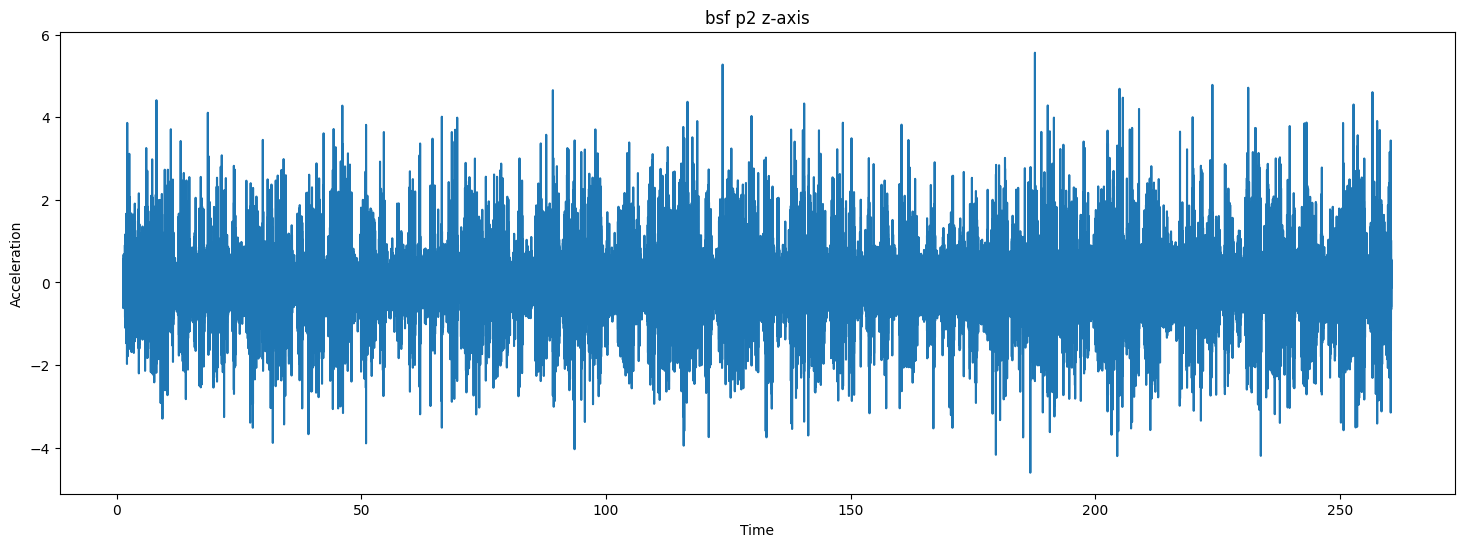

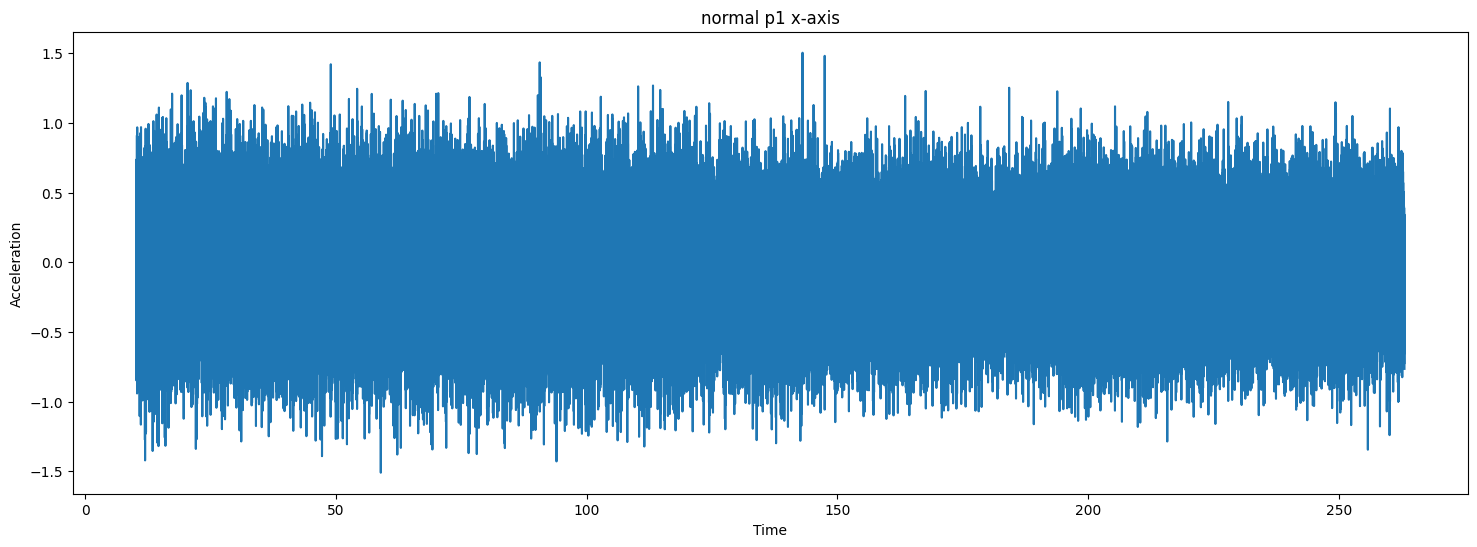

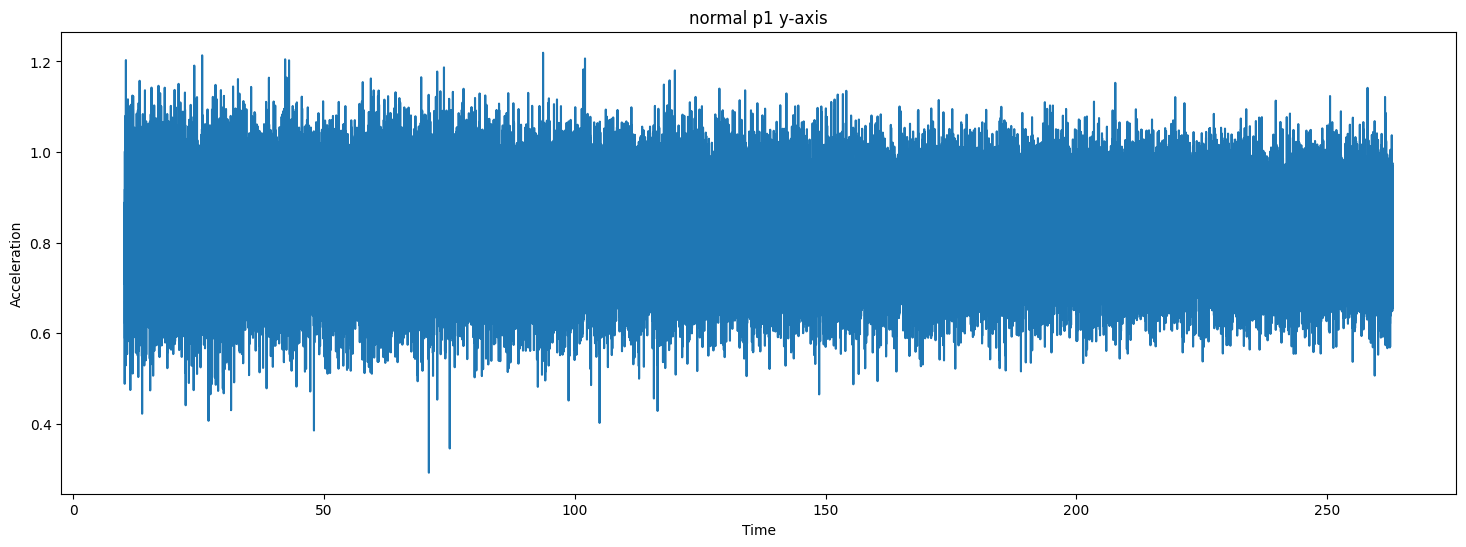

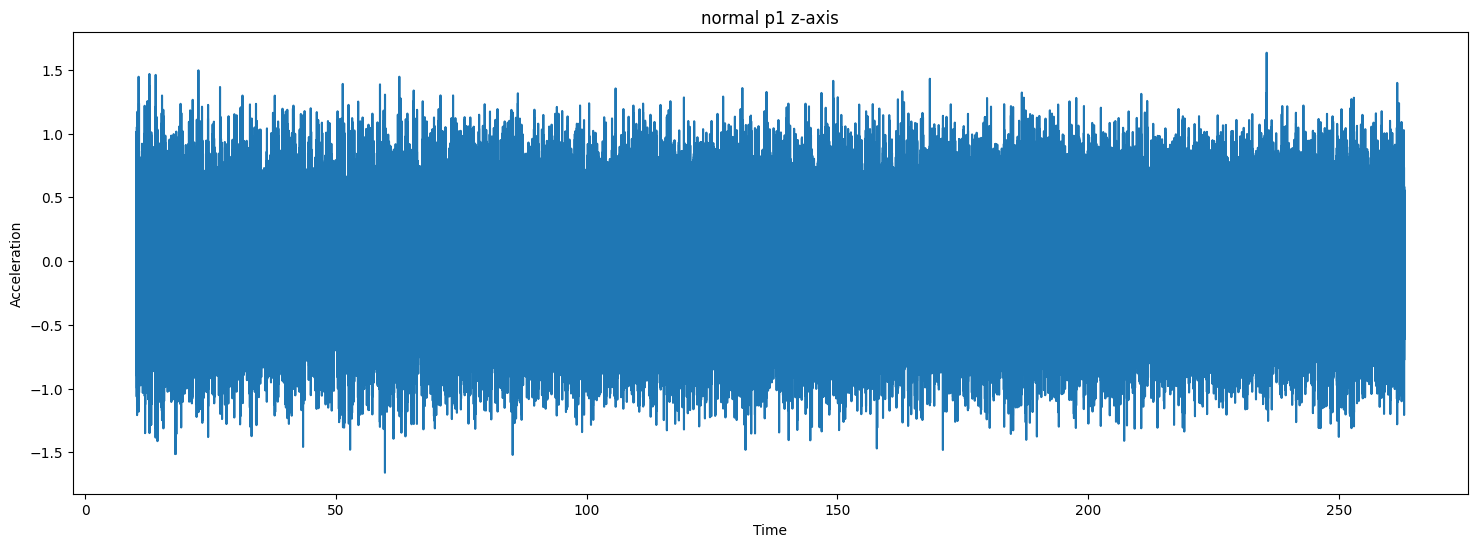

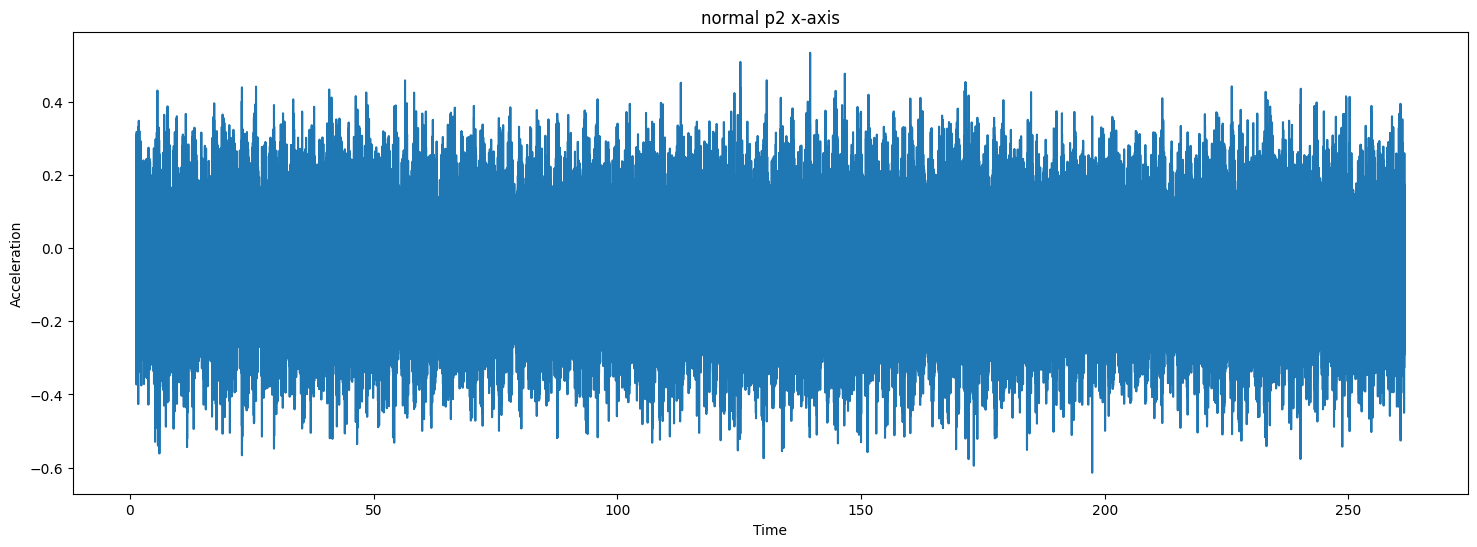

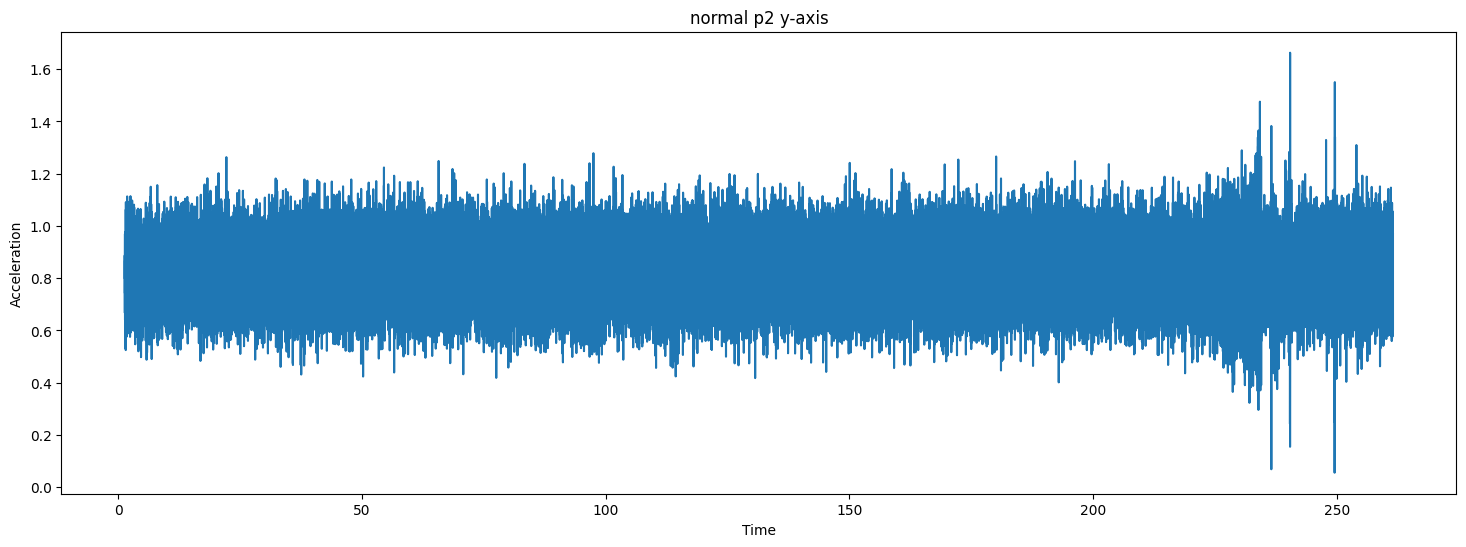

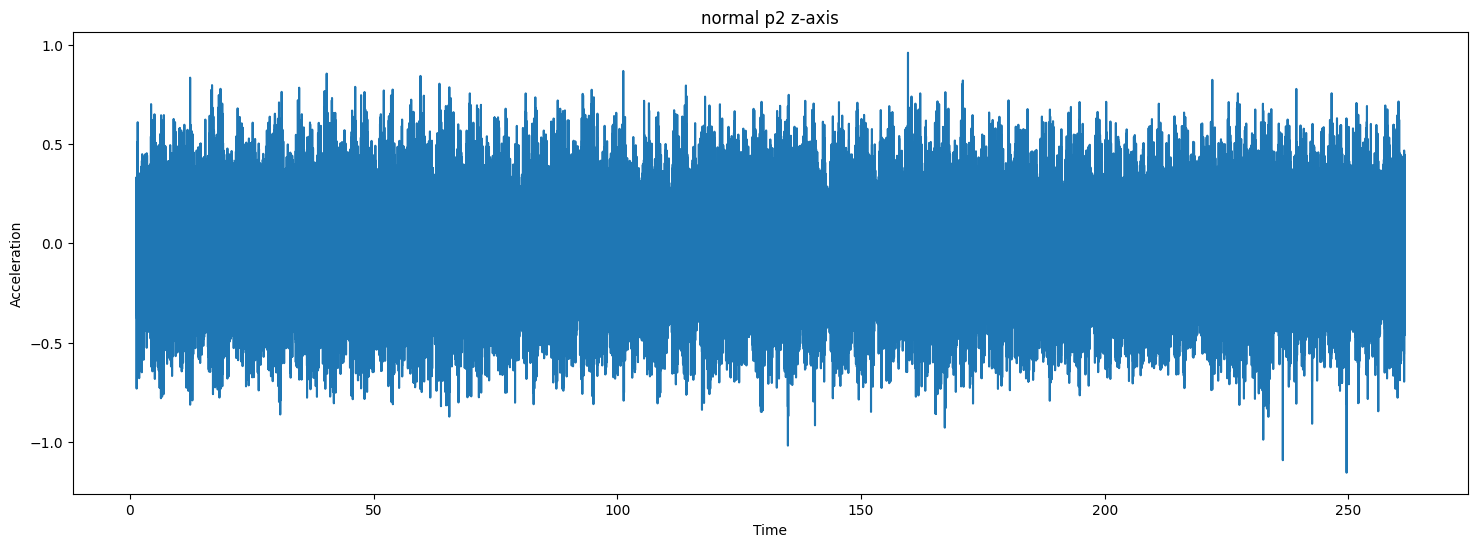

In [60]:
data_folder = "final_data/vibecheck360/seperated_byAxis/"

# Get a list of all the data files in the folder
data_files = os.listdir(data_folder)

# Iterate over each data file
for data_file in data_files:
    # Extract the bearing condition, location, and axis information from the filename
    filename = os.path.splitext(data_file)[0]
    condition, location, axis = filename.split("_")

    # Read the data from the file
    file_path = os.path.join(data_folder, data_file)
    with open(file_path, "r") as file:
        lines = file.readlines()
        data = [[float(value) for value in line.strip().split("\t")] for line in lines]

    # Separate time and acceleration values
    time = [row[0] for row in data]
    acceleration = [row[1] for row in data]

    # Plot the data
    plt.figure(figsize=(18,6))
    plt.plot(time, acceleration)
    plt.title(f"{condition} {location} {axis}")
    plt.xlabel("Time")
    plt.ylabel("Acceleration")

    # Display the plot
    plt.show()